In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/acnaweb/datasets/master/ibge_2015_pessoa.csv")
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
df.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Sexo


In [4]:
frequency = df["Sexo"].value_counts()
percent = df["Sexo"].value_counts(normalize = True) * 100
df_sexo_frequency = pd.DataFrame({"frequency": frequency, "percent": percent})
df_sexo_frequency.head()

,frequency,percent
0,53250,69.299844
1,23590,30.700156


In [5]:
sexo_labels = {0: "masculino", 1: "feminino"}

df_sexo_frequency.rename(index = sexo_labels, inplace = True)
df_sexo_frequency.head()


,frequency,percent
masculino,53250,69.299844
feminino,23590,30.700156


In [6]:
df_sexo_frequency.rename_axis("Sexo", axis = 1, inplace = True)
df_sexo_frequency.head()


Sexo,frequency,percent
masculino,53250,69.299844
feminino,23590,30.700156


### Crosstab


In [7]:
frequency = pd.crosstab(df["Sexo"], df["Cor"])
frequency

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [8]:
cor_labels = {0: "indígena", 2: "branco", 4: "preta", 6: "amarela", 8: "parda", 9: "sem declaração"}

frequency.rename(index = sexo_labels, columns = cor_labels, inplace = True)
frequency

Cor,indígena,branco,preta,amarela,parda
Sexo,,,,,
masculino,256,22194,5502,235,25063
feminino,101,9621,2889,117,10862


In [9]:
percent = pd.crosstab(df["Sexo"], df["Cor"], normalize = True) * 100
percent.rename(index = sexo_labels, columns = cor_labels, inplace = True)
percent

Cor,indígena,branco,preta,amarela,parda
Sexo,,,,,
masculino,0.333160,28.883394,7.160333,0.305830,32.617126
feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [10]:
mean = pd.crosstab(df["Sexo"], df["Cor"], aggfunc = "mean", values = df["Renda"]) 
mean.rename(index = sexo_labels, columns = cor_labels, inplace = True)
mean

Cor,indígena,branco,preta,amarela,parda
Sexo,,,,,
masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### Bins

In [11]:
min = df["Renda"].min()
max = df["Renda"].max()

In [12]:
classes = [df["Renda"].min(), 1576, 3152, 7880, 15760, df["Renda"].max()]
labels = ["E", "D", "C", "B", "A"]

In [13]:
df["Faixa_Salarial"] = pd.cut(x = df["Renda"], bins = classes, labels = labels, include_lowest = True)
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Faixa_Salarial
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


In [14]:
frequency = df["Faixa_Salarial"].value_counts()
percent = df["Faixa_Salarial"].value_counts(normalize = True) * 100
df_faixa_salarial_frequency = pd.DataFrame({"frequency": frequency, "percent": percent})
df_faixa_salarial_frequency

,frequency,percent
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


### Bins (Regra de Sturges)


In [15]:
n = df.shape[0]
n

76840

In [16]:
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
k

17

In [17]:
pd.value_counts(
    pd.cut(x = df["Renda"], 
        bins = k, 
        include_lowest = True
    )
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

In [18]:
pd.value_counts(
    pd.cut(x = df["Renda"], 
        bins = k, 
        include_lowest = True
    ),
    sort = False
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

### Histogram

In [19]:
import seaborn as sns

/home/ac/Local/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Metros')

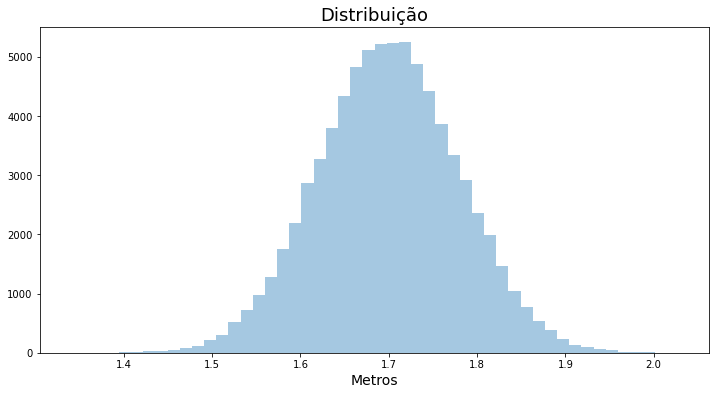

In [20]:
ax = sns.distplot(df["Altura"], kde = False)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição", fontsize=18)
ax.set_xlabel("Metros", fontsize = 14)

Text(0.5, 0, 'Metros')

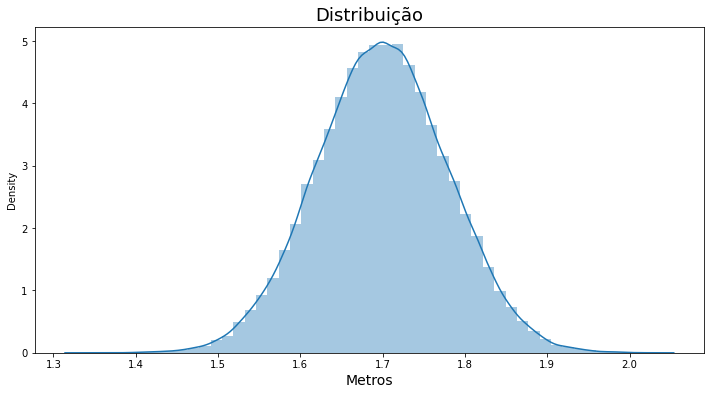

In [21]:
ax = sns.distplot(df["Altura"], kde = True)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição", fontsize=18)
ax.set_xlabel("Metros", fontsize = 14)

<AxesSubplot:>

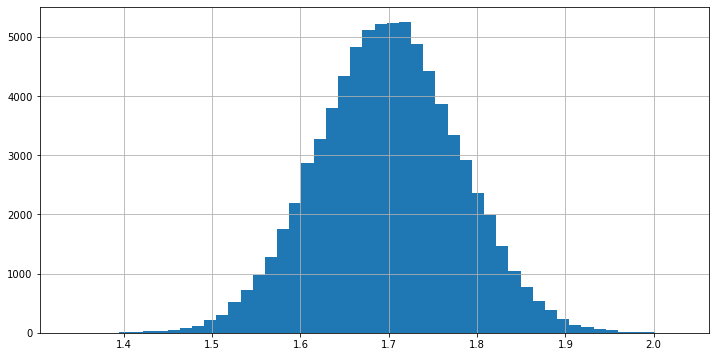

In [22]:
df["Altura"].hist(bins = 50, figsize = (12,6))

<AxesSubplot:>

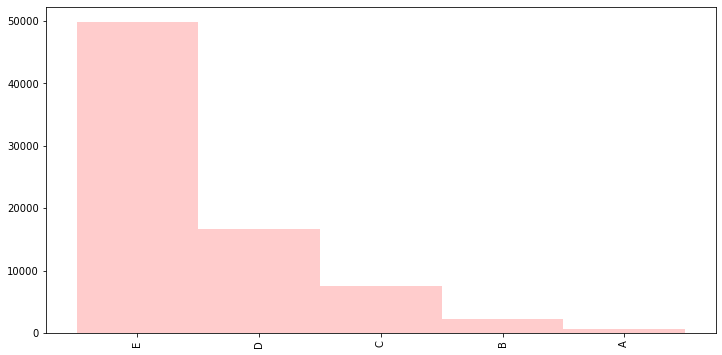

In [23]:
df_faixa_salarial_frequency["frequency"].plot.bar(width=1, color="red", alpha=0.2, figsize=(12,6))

### Mean 

In [24]:
df["Renda"].mean()

2000.3831988547631

### Median

In [25]:
df["Renda"].median()

1200.0

### Group by

In [26]:
df.groupby(["Sexo", "Idade"])["Renda"].mean()

Sexo  Idade
0     13       100.000000
      14       300.000000
      15       700.000000
      16       708.333333
      17       854.631579
                  ...    
1     88       150.000000
      89         0.000000
      90       350.000000
      91         5.000000
      92         0.000000
Name: Renda, Length: 162, dtype: float64

In [27]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

dataset.groupby("Sexo")["Idade"].mean().loc["H"]


45.75

### Mode

In [28]:
dataset.Sexo.mode()

0    M
dtype: object

### Quartis

In [29]:
df.Renda.quantile() # median

1200.0

In [30]:
df.Renda.quantile(q = 0.25)

788.0

In [31]:
df["Renda"].quantile([0.25, 0.50, 0.75]).to_frame()

,Renda
0.25,788.0
0.50,1200.0
0.75,2000.0


### Decis


In [32]:
df["Renda"].quantile([i/10 for i in range(1,10)]).to_frame()

,Renda
0.1,350.0
0.2,788.0
0.3,800.0
0.4,1000.0
0.5,1200.0
0.6,1500.0
0.7,1900.0
0.8,2500.0
0.9,4000.0


### Percentis


In [33]:
df["Renda"].quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

In [34]:
df["Renda"].quantile(0.99) # P99

15000.0

/home/ac/Local/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '%')

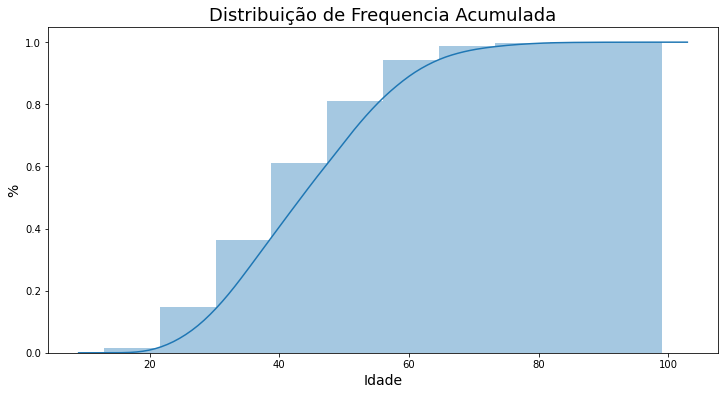

In [35]:
ax = sns.distplot(df["Idade"], 
                hist_kws = {"cumulative": True},
                kde_kws = {"cumulative": True},
                bins = 10)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequencia Acumulada", fontsize=18)
ax.set_xlabel("Idade", fontsize = 14)
ax.set_ylabel("%", fontsize = 14)

### Boxplot

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros'>

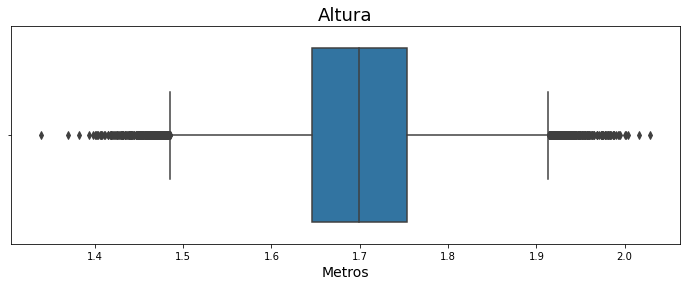

In [39]:
ax = sns.boxplot(x = "Altura",                 
                data = df,
                orient = "h")
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='$', ylabel='UF'>

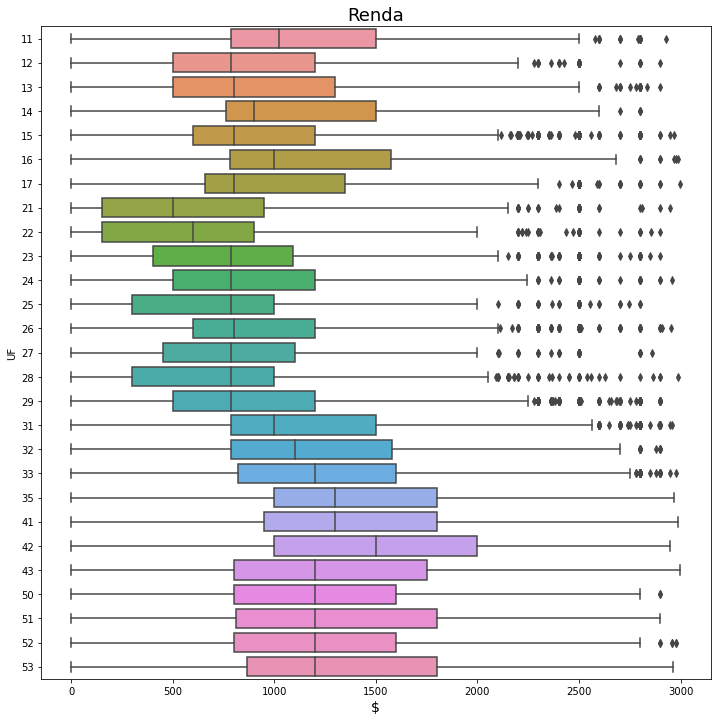

In [51]:
ax = sns.boxplot(x = "Renda",    
                 y = "UF",
                data = df.query("Renda < 3000"),
                orient = "h")
ax.figure.set_size_inches(12, 12)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax

### Desvio Medio Absoluto

In [52]:
df["Renda"].mad()

1526.4951371644931

### Variance

In [53]:
df["Renda"].var()

11044906.00622118

### Standard Deviation

In [54]:
df["Renda"].std()

3323.3877303470294

In [81]:
notas = {"Matemática": 8,
"Português":10,
"Inglês": 4,
"Geografia": 8,
"História": 6,
"Física": 10,
"Química": 8
}

df_notas = pd.DataFrame(notas.items(), columns = ["Disciplina", "Nota"])
df_notas


,Disciplina,Nota
0,Matemática,8
1,Português,10
2,Inglês,4
3,Geografia,8
4,História,6
5,Física,10
6,Química,8


<AxesSubplot:>

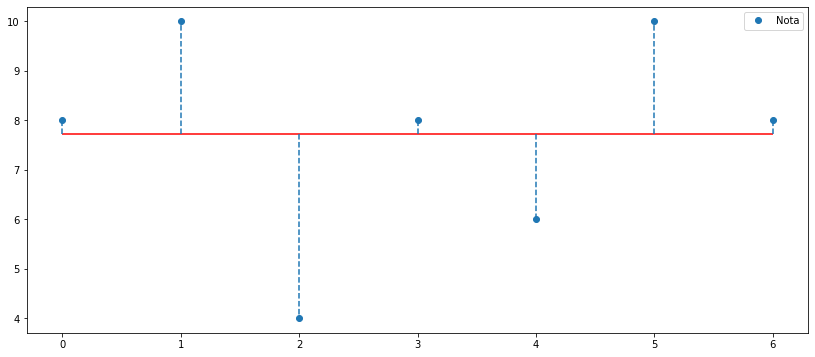

In [91]:
ax = df_notas.plot(style = 'o')

ax.figure.set_size_inches(14, 6)
ax.hlines(y = df_notas.mean(), xmin = 0, xmax = df_notas.shape[0] - 1, colors = 'red')

for i in range(df_notas.shape[0]):
    ax.vlines(x = i, ymin = df_notas.mean(), ymax = df_notas['Nota'][i], linestyle='dashed')
ax

### Summary

In [55]:
df["Renda"].describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

In [59]:
df_renda = df[["Renda"]]
df_renda

,Renda
0,800
1,1150
2,880
3,3500
4,150
...,...
76835,812
76836,1500
76837,1300
76838,1500
